# Background Note 

# Multivariable Calculus

## By Albert S. "Pete" Kyle

$\def \sm {} \renewcommand{\sm}{ {\scriptstyle{\text{*}}}}$ 
$\def \mm {} \renewcommand{\mm}{{\scriptsize @}}$
$\def \E {} \renewcommand{\E}{\mathrm{E}}$
$\def \e {} \renewcommand{\e}{\mathrm{e}}$
$\def \drm {} \renewcommand{\drm}{\mathrm{\, d}}$
$\def \var {} \renewcommand{\var}{\mathrm{var}}$
$\def \cov {} \renewcommand{\cov}{\mathrm{cov}}$
$\def \corr {} \renewcommand{\corr}{\mathrm{corr}}$
$\def \stdev {} \renewcommand{\stdev}{\mathrm{stdev}}$
$\def \t {} \renewcommand{\t}{^{\mathsf{T}}}$
$\def \comma {} \renewcommand{\comma}{\, , \,}$
$\def \vec {} \renewcommand{\vec}[1]{\mathbf{#1}}$
$\def \skew {} \renewcommand{\skew}{\mathrm{skew}}$
$\def \kurt {} \renewcommand{\kurt}{\mathrm{kurt}}$
$\def \prob {} \renewcommand{\prob}{\textrm{prob}}$
$\def \midx {} \renewcommand{\midx}{\, \mid \,}$


In [1]:

import numpy as np
import scipy
import matplotlib.pyplot as plt

import pandas as pd

import sys
import datetime
import timeit

print('Python version ' + sys.version)
print('NumPy version ' + np.__version__)

timestamp = datetime.datetime.now().strftime('%Y-%m%d-%H%M')
print("Timestamp:", timestamp)
tstart = timeit.default_timer()

Python version 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:40:50) [MSC v.1937 64 bit (AMD64)]
NumPy version 1.26.4
Timestamp: 2024-1023-1154


### Importance of calculus in finance

Multivariable calculus has many different uses in finance:

1. Multivariable calculus underlies many optimization techniques, including portfolio optimization, econometrics, machine learning, and neural networks.

2. Calculus is important in probabiliy and statistics, which themselves are important for understanding the relationship between risk and return.

3. Stochastic calculus and partial differential equations are important for derivatives pricing and risk management.

4. Calculus is important for understanding hedging ratios, tradeoffs between marginal costs and benefits, equation solving related to deriving yield-to-maturity from bond prices, and other calculations related to the time value of money, such as **duration** and **convexity**..

Calculus is useful because it simplifies both intution and calculations. The alternative to calculus is discrete approximations which can be opaque, complicated, and computationally inefficient.


### Derivatives

Let $f(x)$ denote some **univariate** function mapping points $x$ in a domain which is a subset of real numbers into a range which is also real numbers.  Let $a$ be some point in an open subset of the  domain of $f$. Then the **derivative** of $f$ at $a$, denoted  $f'(a)$, is  defined by

$$
f'(a) := \lim_{h \rightarrow 0} \frac{f(a + h) - f(a) }{h},
$$

if this limit exists.  If the derivative exists at every point in the domain of the function $f$, then $f(x)$ is a **differentiable function** in its domain. For example, the functions $\log(x)$ and $\sqrt{x}$ are both differentiable in the open domain $(0, +\infty)$, but neither is differentiable in the domain $[0, +\infty)$ because $\log(x)$ is undefined at $x=0,$  and the derivative of $\sqrt{x}$ becomes infinite as $x \rightarrow 0$. The **absolute value** function $f(x) := | x |$ is differentiable for all real numbers $x \in (-\infty, +\infty)$ except $x=0$, where the graph of the function has a kink.

The derivative is the slope to the tangent line to the graph of the function at the point $a$. Considering the point $a$ to be a constant, the tangent line is the graph of the function of $x$ defined by $f(a) + f'(a) \sm (x - a)$. 

An alternative definition of the derivative is that $f'(a)$ is the derivative of $f$ at $a$ if

$$
f(x) = f(a) + f'(a) \sm (x - a) + \epsilon(x) \sm (x- a ), \qquad \text{where } \epsilon(x) \rightarrow 0  \text{ as } x \rightarrow a.
$$

The function $\epsilon(x)$ is the error of the tangent line, $f(a) + f'(a) \sm (x - a)$, as an approximation to the function $f(x)$. This definition says that the tangent line is an arbitrarily accurate linear approximation to $f(x)$ in a sufficiently small neighborhood around $a$. Intuitively, if examined under a microscope at a very small scale, the graph of the potentially nonlinear  function $f(x)$ and the graph of the linear function defined by the derivative-implied tangent line would look almost identical.

If a function is differentiable at a point, it is also continuous at that point. A function which is continuous in an interval need not be differentiable anywhere in that interval. A finance example of a nowhere-differentiable-but-continuous function is the path of a **Brownian motion** process.  A function is **continuously differentiable** if it is a differentiable function and the derivative itself is a continuous function.



### Gradients

Now suppose $f(\vec{x})$ is a function which maps vectors $\vec{x}$ in a subset of $\mathbb{R^N}$ into **scalars** which are real numbers. The function $f(\vec{x})$ is **differentiable** at the vector point $\vec{a}$ if there exists a **gradient vector**, denoted $\nabla f(\vec{a})$ such that

$$
f(\vec{x}) = f(\vec{a}) + \nabla f(\vec{a}) \mm (\vec{x} - \vec{a}) + \epsilon(\vec{x}) \sm |\vec{x} - \vec{a}|,
\qquad \text{where } \epsilon(\vec{x}) \rightarrow 0 \text{ as } \vec{x} \rightarrow \vec{a}.
$$

In this definition, $\nabla f(\vec{a})$ is a vector of dimension $N$ which defines a **linear functional** mapping $N$-vectors $\vec{v}$ to the scalar values $\nabla f(\vec{a}) \mm \vec{v}$.  The function of $\vec{x}$ defined by $f(\vec{a}) + \nabla f(\vec{a}) \mm (\vec{x} - \vec{a})$ is a linear approximation to the function $f(\vec{x})$. The scalar-valued function $\epsilon(\vec{x})$ defines the error of this approximation as a fraction of of the **norm** (length) of $\vec{x} - \vec{a}$. This norm is the **Euclidean norm** defined by $|\vec{z}| = \sqrt{\vec{z}[0]^2 + \vec{z}[1]^2 + \ldots + \vec{z}[N-1]^2}$, with $\vec{z} := (\vec{z}[0], \vec{z}[1], \ldots, \vec{z}[N-1])$. The definition of the gradient says that the linear approximation becomes arbitrarily accurate in a small enough neighborhood of $\vec{a}$.

The gradient symbol $\nabla$, which looks like an upside-down capital-delta ($\Delta$) symbol,  is often called **nabla**.

In one dimension, the linear approximation defined by the derivative of a univariate function is a tangent line.  In two dimensions, the two-dimensional gradient vector defines a tangent plane to a function whose domain is a subset of a plane.  In three or more dimensions, the linear approximation defines a **hyperplane**, which is hard to grasp intuitively but satisfies many of the intuitive properties of the one- or two-dimensional cases.

The $N$ components of the gradient vector are **partial derivatives** of the the function $f(\vec{x})$. The $n\!$ th partial derivative of $f(\vec{x})$ is the derivative of the univariate function defined by freezing all of the values of $\vec{x}$ except for the $n\!$ th one. For example, in three dimensions, we can define the univariate function $f_0(x) := f((x, \vec{a}[1], \vec{a}[2]))$. The $0\!$ th (or first) partial derivative is $f_0'(x)$, which is often denoted $\partial f(\vec{x}) / \partial x_0$. In the case of three dimensions, there are three partial derivatives, defined analogously as $\partial f(\vec{x}) / \partial x_0$, $\partial f(\vec{x}) / \partial x_1$, $\partial f(\vec{x}) / \partial x_2$. (Note that here I have followed the Python convention of indexing from $0$ to $N-1$; the more standard convention is to index from $1$ to $N$, but the idea is the same.)

To summarize, generalizing the concept of a univariate derivative to an arbitrarily large finite number of dimensions is straightforward. It simply requires generalizing the concept of a tangent line defined by a linear function of one variable to a tangent hyperplane defined by a linear function of many variables.  This linear function is itself defined by a gradient vector which generalizes the concept of a scalar derivative to multile dimensions.



### Rotation and rescaling

One conceptual issue concerns the distinction between a gradient vector considered as a linear functional and the gradient vector interpreted as a vector of specific numbers each of which is a partial derivative. Consider a function defined on a two-dimensional space to which we give a geographic interpretation.  We can impose on the the geography a Cartesian coordinate system in which the positive vertical axis points north, the positive horizontal axis points east, and distances are measured in miles. There is, however, no theoretical reason why we could not have the vertical axis point in a different direction and measure distances in kilometers instead of miles. Changing the coordinate system would not change a function which mapped each geographic point to its altitude above sea level, nor would it change the gradient vectors, which have interpretations as directions of steepest ascent (uphill). The change in coordinates would change the numerical values of the partial derivatives, which are numbers defined with respect to a specific coordinate system which defines what points north and defines whether distance is measured in miles, kilometers, or something else.

This conceptual issue is also important in finance. Portfolios of assets are often defined as linear combinations of assets, just as points on a map are defined by distances in north-south and east-west directions. Portfolios of assets can be rotated and rescaled just like geographic measurements. This is done for various reasons, including intuitive interpretation and numerical stability.

### Jacobian

Now let $\vec{f} : \mathbb{R}^N \rightarrow \mathbb{R}^M$ denote a function mapping $N$-vectors into $M$-vectors. We can think of $\vec{f}$ as $M$ separate functions $f_1$, $\ldots$, $F_M$ stacked together. If the function $\vec{f}$ is differentiable at a vector-valued point $\vec{x}$, the **Jacobian matrix** is defined as the matrix of partial derivatives:

$$
\vec{J}(\vec{x}) = 
\left[ \begin{array}{c c c }
\dfrac{\partial{f_1(\vec{x})}}{\partial x_1} & \ldots & \dfrac{\partial{f_1(\vec{x})}}{\partial x_N} \\  
\vdots & \ddots & \vdots \\
\dfrac{\partial{f_M(\vec{x})}}{\partial x_M} & \ldots & \dfrac{\partial{f_M(\vec{x})}}{\partial x_N} \\  
\end{array} \right] .
$$




### Bookkeeping issue: rows or columns?

One bookkeeping issue concerns whether to think of gradients as row vectors or columns vectors. A related issue is whether the Jacobian matrix of the function $\vec{f} : \mathbb{R}^N \rightarrow \mathbb{R}^M$ is and $N \times M$ matrix or the transposed $M \times N$ matrix.  In the definition of the Jacobian above, the rows of the matrix correspond to the gradients of the component functions $f_1$, $\ldots$, $f_M$. This suggests a convention which defines the gradient vector as a row vector.  

In fact, the gradient vector is sometimes defined as a row vector and sometimes defined as a column vector. Similarly, the Jacobian matrix is sometimes defined as an $N \times M$ matrix and sometimes as an $M \times N$ matrix. Of course, the specific convention used does not ultimately matter. Nevertheless, this bookkeeping issue can be a source of confusion.

For exmaple, it arises when defining notation for derivatives of linear and quadratic functions (as discussed below).

### Second derivative, Hessian

The **second derivative** of a univariate function is simply the derivative of the first derivative.

Analogously, the second derivative of a function $f:\mathbb{R}^N \rightarrow \mathbb{R}^1$ is the Jacobian of the gradient. Since the gradient is a mapping from $\mathbb{R}^N$ into a gradient vector also in $\mathbb{R}^N$, the second derivative can be represented as a square matrix of size $N \times N$, the elements of which are the **second partial derivatives** (partial derivatives of partial derivatives) of $f$ evaluated at some point $\vec{x}$. This matrix is called the **Hessian** matrix:

$$
\vec{H}(\vec{x}) = 
\left[ \begin{array}{c c c }
\dfrac{\partial^2{f(\vec{x})}}{\partial x_0^2} & \ldots & \dfrac{\partial^2{f(\vec{x})}}{\partial x_0 \partial x_{N-1}} \\  
\vdots & \ddots & \vdots \\
\dfrac{\partial^2{\vec{f}(\vec{x})}}{\partial x_{N-1} \partial x_0} & \ldots & \dfrac{\partial^2{\vec{f}(\vec{x})}}{\partial x_{N-1}^2} \\  
\end{array} \right] ,
\qquad \text{where } 
\vec{H}(\vec{x})[i,j] = \dfrac{\partial^2{\vec{f}(\vec{x})}}{\partial x_i \partial x_j}.
$$

(Here again, I have departed from the standard convention by indexing from 0 to $N-1$ instead of from 1 to $N$.)

If the second derivative is continuous, which is usually the case in finance applications, the Hessian matrix is symmetric.  This happens because the order in which partial derivatives are taken does not affect the result, so $\partial^2 f/ \partial x_i \partial x_j = \partial^2 f / \partial x_j \partial x_i$.



### Taylor series

The **Taylor series** $T(x)$ of an **infinitely differentiable** function $f(x)$, evaluated at $x$, is the **infinite series** in $\Delta x$ defined by

$$
T(x + \Delta x) := f(x) + f'(x) \sm \Delta x + \frac{1}{2} \sm f''(x) \sm \Delta x^2 + \ldots 
+ \frac{1}{n!} \sm  f^{(n)}(x) \sm \Delta x^n + \dots ,
$$

where $f^{(n)}(x)$ denotes the $n\!$ th derivative of $f$.

If you mechanically differentiate $T(x)$ following the rules for differentiating polynomials, you find that each derivative of $T(x)$ is the same as the corresponding derivative of $f(x)$.

An infinite series has a **radius of convergence**, defined as the largest value $r$ for which the series convergerges for any $|\Delta x| < r$. The radius of convergence can be zero, infinity, or anything in between. If the radius of convergence is infinite, the function is called an **entire function**. Entire functions play a central role in **complex analysis**.

Here are some examples:

1. The Taylor series of a polynomial is the polynomial itself, which has an infinite radius of convergence.

2. The **exponential function** $\e^x$ is defined by its Taylor series:

$$
\e^x := 1 + x + \frac{1}{2} \sm x^2 + \ldots + \frac{1}{n!} \sm  x^n + \ldots .
$$

The exponential function has an infinite radius of convergence. It can also be defined as the function whose derivative is the function itself and satisfies $f(0) = 1$.

3. The function $\log(x)$ has a Taylor series with radius of convergence $|\Delta x| < x$:

$$
\log(x + \Delta x) = \log(x) + \frac{1}{x} \sm \Delta x - \frac{1}{2 \sm x^2} \sm \Delta x^2 + \ldots + \frac{(-1)^{n+1}}{n \sm a^n} \sm \Delta x^n + \ldots,
\qquad \text{where} \qquad |\Delta x| < x>.  
$$

4. The Taylor series of $f(x) = \frac{x}{x - \Delta x}$, expanded around $x=1$, has radius of convergence of 1, and gives us

$$
\frac{1}{1 - \Delta x} = 1 + \Delta x + \Delta x^2 + \dots + \Delta x^n + \ldots,
\qquad \text{where} \qquad |\Delta x| < 1.
$$

The first two terms in a Taylor series, $f(x) + f'(x) \sm \Delta x$, define the tangent line approximation to a differentiable function. We can call this a **first-order** approximation (i.e., based on the first derivative only). 

The first three terms, $f(x) + f'(x) \sm \Delta x + \frac{1}{2} \sm f''(x) \sm \Delta x^2 $ approximate a differentiable function with a quadratic function.   We can call this a **second-order** approximation (i.e., based on the first two derivatives only). This quadratic approximation matches the value (level), first derivative, and second derivative of the approximated function at the point of approximation $x$.

In finance, Taylor series arise in studying the time value of money over infinite horizons. Taylors series also arise in equation solving and optimization.

### Optional: Implicit function theorem and Inverse function theorem

Let $f(x, y)$ be a continuously differentiable function of both $x$ and $y$, where both $x$ and $y$ are real numbers. Consider the following intuition: The equation $f(x, y) = 0$ seems to implicitly define a function $x = g(y)$. Furthermore, I can calculate the derivative of this function by expanding $f(x, y) = 0$ with a Taylor series and solve for $g'(x) = \drm x / \drm y$ to obtain

$$
f(x + \Delta x, y + \Delta y) = f(x, y) + \frac{\partial f}{\partial x}(x,y) \sm \Delta x 
+  \frac{\partial f}{\partial y}(x,y) \sm \Delta y = 0
\qquad \text{which implies} \qquad 
g'(y) = \frac{\drm x}{\drm y} = -\frac{\frac{\partial f}{\partial y}(x,y)}{\frac{\partial f}{\partial x}(x,y)} .
$$

Obviously, this intuition is not always valid. For example, it does not work when $\frac{\partial f}{\partial x}(x,y) = 0$ since this leads to division by zero.

The **implicit function theorem** provides conditions under which this intuition is valid: I $f(x, y)$ is continuously differentiable and the partial derivative $\frac{\partial f}{\partial x}(x,y)$ is non-zero, then the function $x = g(y)$ is uniquely defined and continuously differentialbe in a neighborhood of $y$, and its derivative is indeed $g'(y) = -\frac{\frac{\partial f}{\partial y}(x,y)}{\frac{\partial f}{\partial x}(x,y)}$.

Furthermore, the **implicit function theorem** generalizes to vector-valued functions.  Let $\vec{x}$ and $\vec{y}$ be vectors in $\mathbb{R}^M$ and $\mathbb{R}^N$ respectively. Suppose $f(\vec{x}, \vec{y}) : \mathbb{R}^{M + N} \rightarrow \mathbb{R}^{M}$ is continuously differentiable with $(N + M) \times M$ Jacobian matrix which we write as

$$
Jf(\vec{x}, \vec{y}) := \left[ Jf_\vec{x}(\vec{x}, \vec{y}), Jf_\vec{y}(\vec{x}, \vec{y}) \right],
$$

where $Jf_\vec{x}(\vec{x}, \vec{y})$ and $Jf_\vec{y}(\vec{x}, \vec{y})$ are matrices of partial derivatives.

Assume that the $M \times M$ Jacobian matrix $\frac{\partial f}{\partial \vec{y}}(\vec{x}, \vec{y})$ is invertible. Then $f(\vec{x}, \vec{y}) = \vec{0}_M$ implicitly defines a unique function $g: \mathbb{R}^M \rightarrow \mathbb{R}^M$, whose derivative is 

$$
\nabla g(\vec{y}) := -\left( \frac{\partial f}{\partial \vec{y}} \right)^{-1} \mm \frac{\partial f}{\partial \vec{x}}.
$$

The **inverse function theorem** is obtained by assuming $M = N$ and changing $f(\vec{x}, \vec{y})$ to $f(\vec{x}) - \vec{y}$. Then the implicit function $f(\vec{x}) = \vec{0}_N$ has an inverse $\vec{x} = g(\vec{y})$ with derivative $(\frac{\partial f}{\partial \vec{y}})^{-1}$ when the Jacobian matrix $\frac{\partial f}{\partial \vec{y}}$ is invertible.

### Concave and convex functions

A **convex set** is defined by the property that all points on a line segment connecting any two points in the set also lie in the set. Let $X$ be a convex set, and let $f:X \rightarrow \mathbb{R}$ be a function.  The function $f(x)$ is a **convex function** if all points on every line segment (**chord** defined by the **secant line**) connecting two points on the graph of the function lie on or above the graph of the function. Mathematically, $f(x)$ is a convex function if, for any two distinct points $x_0$ and $x_1$ and any values of $\alpha$ such that $0 < \alpha < 1$, we have

$$
f \big( \alpha \sm x_0 + (1-\alpha) \sm x_1 \big) \le \alpha \sm f(x_0) + (1 - \alpha) \sm f(x_1) .
$$

A function is **concave** if $-f(x)$ is convex. A function is **strictly convex** if the inequality above is made strict. A linear function is both concave and convex but is neither strictly concave nor strictly convex.

Examples of convex functions are the quadratic function $f(x) = \frac{1}{2} \sm a \sm x^2 + b \sm x + c$ with $a>0$ and the exponential function $\e^x$. Examples of concave functions are the same quadratic function, except with $a<0$, and the function $\log(x)$.

Here is a set of plots illustrating convexity and concavity.

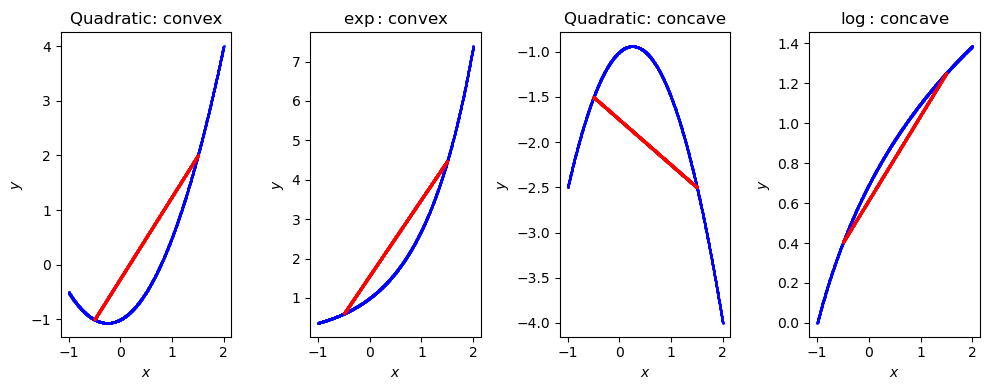

In [2]:
nobs = 1000
x0, x1 = -1.00, +2.00
x = np.linspace(start=x0, stop=x1, num=nobs, endpoint=True)
a, b, c = 1.00, 0.50, -1.00
fs = [lambda x: a*x**2 + b*x + c, np.exp, lambda x: -a*x**2 + b*x + c, lambda x: np.log(2.00 + x)]
y = [f(x) for f in fs]

xx0, xx1 = -0.50, 1.50
xx = np.linspace(start=xx0, stop=xx1, num=nobs, endpoint=True)
alphas = np.linspace(start=0.00, stop=1.00, num=nobs, endpoint=True)
yy = [(1 - alphas) * f(xx0) + alphas * f(xx1) for f in fs]

fig, ax = plt.subplots(1, 4, figsize=(10, 4))

titles = ["Quadratic: convex", "$\exp$: convex", "Quadratic: concave", "$\log$: concave"]
for i in range(4):

    ax[i].scatter(x, y[i] , color='b', s=1.0)
    ax[i].scatter(xx, yy[i] , color='r', s=1.0)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel("$x$")
    ax[i].set_ylabel("$y$")

plt.tight_layout()



### Jensen's inequality

**Jensen's inequality** states that if $f(x)$ is a convex function and $X$ is a random variable defined on the convex domain of $f$, then then

$$
f \left( \E [ X ] \right) \le \E \left[ f(X) \right].
$$

Jensen's inequality generalizes the idea that the red line line segment lies above the blue graph of the functions $f(x)$ in the plots above. For example, if $X$ is a probability distribution equal to $x_0$ with probability $\alpha$ and $x_1$ with probability $1-\alpha$, then blue line is the left side of the above inequality and the red line is the right side, with different points on the blue and red lines corresponding to different values of $\alpha$.





### Convexity and derivatives

If a univariate convex function $f(x)$ is differentiable in a convex domain $\mathcal{D}$, the graph of the function lies above or on every tangent line:

$$
f(x + \Delta x) \ge f(x) + f'(x) \sm \Delta x \qquad \text{for all} \qquad x + \Delta x \in \mathcal{D}.
$$

This idea generalizes to multiple dimensions.  If $\vec{f}(\vec{x})$ is a differentiable univariate function of a vector $\vec{x}$ on a convex vector domain $\mathcal{D}$, and $\Delta \vec{x}$ is another vector, then

$$
\vec{f}(\vec{x} + \Delta{\vec{x}}) \ge \vec{f}(\vec{x}) + \nabla\vec{f}(\vec{x}) \mm \Delta \vec{x}
 \qquad \text{for all} \qquad \vec{x} + \Delta \vec{x} \in \mathcal{D} .
$$

For this vector case, the tangent plane or hyperplane associated with the gradient $\nabla \vec{f}(\vec{x})$ lies below or on the multidimensional graph of the function.

A univariate function with both first and second derivatives is convex if and only if its second derivative is nonnegative everywhere. It is concave if and only if its second derivative is nonpositive everywhere.

To generalize this idea to functions with vector arguments, we need to define what it means for the hessian matrix to be "nonnegative".  The correct generalization uses the concept of a **positive semidefinite matrix**. If a function mapping vectors to scalars, from a convex doman, has a hessian matrix which is itself a continuous function, the function is convex if and only if its hessian matrix is positive semidefinite for all values of $\vec{x}$.



### Optimization problems

In finance and economics, it is often important to find the maximum or mininum value of a function on a specific domain.

The field of **mathematical optimization** considers many different types of problems. It is an active field of research, with new research problems opened up by the increasing power of computers.

Well-formulated optimization problems are often called **programs** (not to be confused with **computer programs**); thus, mathematical optimization is often called **mathematical programming**. Often, there are constraints.  

Optimization problems can be classified as **discrete** or **continuous**. **Integer programming** or **combinatorial optimization** solves problems for optimal values of parameters in finite or countable sets, typically represented as `int32` or `int64`. **Continuous optimization** solves problems over continuous variables, typically `float32` or `float64` approximations to real numbers.

The **standard form** for a generic  **constrained optimization problem** is to minimize a function with both inequality constraints and equality constraints:

$$
 \min_{\vec{x}}  f(\vec{x})  
 \qquad \text{subject to} \qquad 
 g_j(\vec{x}) \le 0  \text{ for } j = 0, \ldots, J-1,
 \qquad h_k(\vec{x}) = 0 \text{ for } k = 0, \ldots, K-1.
$$

Here $f$, $g_j$, and $h_k$ are functions mapping $\mathbb{R}^N$ into $\mathbb{R}$. The function $f(\vec{x})$ is called the **objective function**, the functions $g_j(\vec{x})$ define **inequality constraints**, and the functions $h_k(\vec{x})$ define **equality constraints**. If there are no constraints ($J=K=0$), the problem is an **unconstrained optimization problem**.

The optimization problem could be equivalently written as a maximization problem by replacing $f$ with $-f$. Statisticians often formulate optimization problems as minimization problems. In finance and economics, optimization problems are typically formulated as maximization problems (e.g., maximizing profits, maximizing utility, or---for econometric applications---maximum likelihood).

Optimization problems can also be classified into **convex** or **nonconvex**. **Convex programming**  solves problems where, in the standard form above, the function $f$ is convex, the functions $g_j$ are all convex, and the functions $h_k$ are linear.  Nonconvex programming solves problems where these functions need need not have these convexity properties.

**Linear programming** solves problems in which $f$, $g_j$, and $h_k$ are all linear. **Quadratic programming** solves problems in which $f$ is quadratic, the $g_j$ are all linear, and the $h_k$ are all linear.  If you add a quadratic form to the objective function in a linear program, you obtain a quadratic program.

### First- and second-order conditions for optimization

We will be concerned with continuous optimization. In general, the difficulty of finding an optimum (either maximum or minimum) depends on whether a function is continuous, whether it has a first derivative, whether it has a second derivative, whether the derivatives are "well-behaved", and whether it is convex or concave.

For an arbitrary function $f(x)$ which is not continuous, finding its minimum is hopelessly difficult. For example, suppose $f(x)=1$ at all points except one point $x_0$, where $f(x_0)=0$. Finding the minimum of this function is equivalent to finding $x_0$. If $x_0$ is some random point, it will generally be impossible to find because there are an uncountably infinite number of real numbers and no algorithm is better than random guessing.

Now consider a continuous function $f(\vec{x})$ from a subset of $\mathbb{R}^N$ to $\mathbb{R}$. Suppose its domain is a **compact** set. A set is **compact** if it is  **closed** and **bounded**.  A set is **closed** if any convergent sequence of points converges to a point in the set.  The **open interval** $(0,1)$ is not closed because sequences of points can converge to the endpoints $0$ and $1$, which are not in the set. A set is **bounded** if the distance between any two points is less than some fixed finite value.  The **closed interval** $[0,1]$ is compact because it is both closed and bounded. The **boundary** of the set is the subset of points such that there exist points not in the set which are arbitrarily close to the boundary point. Points not on the boundary are **interior points**.

A continuous function defined on a compact set achieves both its maximum and minimum at some point in the set. This is an important and useful fact, but it does not make the problem of finding the maximum or minimum easy. In principle, it may be necessary to conduct an exhaustive **grid search**, but even a grid search may not work. Consider, for example, the problem of an ant finding the tallest tower on the surface of the earth (a sphere is compact).  If the tower is a pencil-thin object located at some random point, the ant might need to search every location the size of the end of a pencil.

Now suppose the function has a first derivative at all points in the interior of its domain, which we will assume to be a closed set. If the maximum or minimum of the function is an interior point, the derivative of a function $f:\mathbb{R} \rightarrow \mathbb{R}$ must be zero at that point. This fact is obvious because, if the derivative is nonzero, a higher or lower function value is obtained by moving to a point slightly larger or smaller. For a function $f:\mathbb{R}^N \rightarrow \mathbb{R}$, the gradient at a maximum or minimum must be the zero vector, which I denote $\vec{0}_N$. We say that such points satisfy the **first-order conditions** for an optimum. The first-order conditions are **necessary**, but not **sufficient**, conditions for an interior point to be an  optimum. If there are only a finite number of points satisfying the first order conditions, and the global optimum is an interior point, then one of the points satisfying the first-order conditions must be a **global optimum**. In general, a point satisfying the first-order conditions may be global maximum, global minimum, **local maximum**, **local minimum**, or neither a local maximum or minimum. If the optimum exists but is not an interior point, then it lies somewhere on the boundary. 

Now suppose the function has a both first and second derivatives at all points on the interior of its domain. For $f:\mathbb{R} \rightarrow \mathbb{R}$, if $f$ satisfies the first-order condition $f'(x)=0$ and also satisfies the **second-order condition** for a minimum $f''(x)>0$, the point $x_0$ is a local minimum, and may or may not be a global minimum. Analogously, if $f'(x_0)=0$ and $f$ satisfies the **second-order condition** for a local maximum $f''(x_0) < 0$, then the point $x_0$ is a local maximum, and may or may not be a global maximum. 

This point generalizes to a function defined on a domain of vectors, such as $f:\mathbb{R}^N \rightarrow \mathbb{R}$. Suppose the function satisfies the first-order condition that the gradient is zero, $\nabla f(\vec{x}) = \vec{0}_N$. The second derivative is a square, symmetric hessian matrix $\vec{H f}(\vec{x})$. The second-order condition for a maximum generalizes from the univariate derivative being negative to the hessian matrix being **negative definite**. Similarly, the second-order condition for a minimum is that the hessian matrix is **positive definite**. These second-order conditions are **sufficient** for a local optimum, but they are not necessary. For example, when the hessian is neither positive definite nor negative definite, it might be positive semidefinite or negative semidefinite, in which case a point might be a local maximum, local minimum, or neither (**saddle point**).

Even when a function has second derivatives, the problem or characterizing the maxima and minima of the function is very difficult. 


### Solving optimization problems

One way to solve optimization problems is to find all solutions to the first-order conditions then compare all of these solutions and also compare the solutions with values of the function on its boundary. This approach works for simple problems, such as the case when the objective function is a polynomial defined on a closed interval. In this case it is known that the polynomial of degree $N$ has at most $N$ roots, algorithms exist for finding these roots, and the $N$ roots can be compared with the two boundary points to find the global optimum.

Often, it is impractical to find all solutions to the first-order conditions and evaluate them.  This is especially the case when $f:\mathbb{R}^N \rightarrow \mathbb{R}$ is a vector-valued function, and the vector has high dimension (i.e., $N$ is a large number). Researchers typically solve such optimization problems, whether constrained or unconstrained, by searching over the domain of the function using an **iterative** approach which starts with a guess and then tries to improve the guess by taking advantage of the known structure of the problem, such as whether first or second derivatives exist and can be calculated in a practical way. 

### Convex optimization

The problem of finding an unconstrained minimum is easier if it is known that the function is convex. Analagously, it is equally easier to find an unconstrained maximum if it is known that the function is concave. 

Here are the main important points:

1. If the first-order conditions $\nabla f(\vec{x}) = \vec{0}_N$ are satisfied, the point $\vec{x}$ is a global minimum, not just a candidate local minimum.

2. If the second-order condition that the hessian matrix, $\vec{H f}(\vec{x})$, is positive definite is also satisfied, then a point satisfying the first-order conditions is the **unique** global minimum, not just a local minimum.

3. If the hessian matrix, $\vec{H f}(\vec{x})$, is positive definite at every point in the domain of the function, then the function is globally strictly convex.

In finance, economics, statistics, and machine learning applications, it is sometimes known that a function is concave or convex. Sometimes it is not known whether an objective function is concave or convex. When it is not known, it is typical for an algorithm to find a point which can be verified to be a local minimum, due to satisfying first- and second-order conditions. Typically, a proof that the point is a globabl minimum is elusive. A researcher can try to find an improved local minimum by running the algorithm again from different starting points or by randomly perturbing known local minima to see if a better local minimum is found. 




### Unconstrained quadratic optimization problems

Let us consider an unconstrained optimization problem with a quadratic objective function.  In principle, this should be an easy problem. In fact, some interesting algorithmic issues arise which make solving such problems harder than you might think.

The univariate case is indeed easy. Let $f(x) : \mathbb{R} \rightarrow \mathbb{R}$ be a univariate quadratic function defined by $f(x) = \frac{1}{2} \sm a \sm x^2  + b \sm x + c$, where $a$, $b$, and $c$ are scalars. The first derivative is the linear function $f'(x) = a \sm x + b$, and the second derivative is the constant function $f''(x) = a$. The solution to the first-order condition $f'(x) = 0$ is $x = -b/a$. If $a$ is positive, the function is globally convex. The second-order conditions for a minimum is satisfied, so $x = -b/a$ is the global minimum.  Analoguously, if $a$ is strictly negative, the solution to the first-order condition is a global maximum.

Now let us generalize the univariate case to the case of a quadratic vector-valued function $f:\mathbb{R}^N \rightarrow \mathbb{R}$. This function has the form

$$
f(\vec{x}) = \tfrac{1}{2} \sm \vec{x} \t \mm \vec{A} \mm \vec{x} + \vec{b} \t \mm \vec{x} + c. 
$$

Here $\vec{A}$ is a symmetric $N \times N$ matrix, which we will assume to be positive definite, consistent with the second-order condition for a minimization problem; $\vec{b}$, like $\vec{x}$, is a vector of size $N$; and $c$ is a scalar. The term $ \tfrac{1}{2} \sm \vec{x} \t \mm \vec{A} \mm \vec{x}$ is a **quadratic form**, which is a positive scalar if $\vec{x} \ne \vec{0}_N$ (since $\vec{A}$ is positive definite). The gradient vector is the **linear functional**

$$
\nabla f(\vec{x}) =  \vec{A} \mm \vec{x}  + \vec{b}. 
$$

If $\vec{A}$ were not symmetric, the derivative of $\vec{x} \t \mm \vec{A} \mm \vec{x}$ would have been $\tfrac{1}{2} \sm (\vec{A} + \vec{A} \t) \mm \vec{x}$, but this is equal to $\vec{A} \mm \vec{x}$ since $\vec{A}$ is assumed to be symmetric. 

If we type this notation into Python, using Numpy, we get what we probably want and expect:



In [3]:

A = np.array([2.0, 0.0, 0.0, 4.0]).reshape((2,2))
b = np.array([3.0, 5.0])
c = 7.0
x = np.array([0.00, 0.0])

def f(x):
    return  0.50 * x.T @ A @ x + b @ x + c

res = f(x)

print(f"{A.shape=}\n{b.shape=}\n{type(c)=}\n{x.shape=}\n")
print(f"{(x.T @ A).shape=}\n{(A @ x).shape=}\n{type(x.T @ A @ x)=}\n{type(b @ x)=}\n{type(res)=}")
print(f"{(x @ A).shape=}\n{(A @ x.T).shape=}")



A.shape=(2, 2)
b.shape=(2,)
type(c)=<class 'float'>
x.shape=(2,)

(x.T @ A).shape=(2,)
(A @ x).shape=(2,)
type(x.T @ A @ x)=<class 'numpy.float64'>
type(b @ x)=<class 'numpy.float64'>
type(res)=<class 'numpy.float64'>
(x @ A).shape=(2,)
(A @ x.T).shape=(2,)


### Note on Notation

In the Python cell above, the vectors `b` and `x` are defined as one-dimensional arrays of shape `(2,)`. This means that `b` and `x` are "generic" vectors, which are neither row vectors nor column vectors.  To obtain column vectors, we could have defined `b` and `x` to have shape `(2,1)` by using `reshape((2,1))`.

The mathematical gradient $\nabla f(\vec{x}) =  \vec{A} \mm \vec{x}  + \vec{b}$ implicitly assumes that the gradient vector is a column vector. This is inconsistent with the convention that the gradient vector is a row vector. To make the gradient a row vector, we should have written

$$
\nabla f(\vec{x}) \t =  \vec{A} \mm \vec{x}  + \vec{b}
\qquad \text{or} \qquad
\nabla f(\vec{x}) =  \vec{x} \t \mm \vec{A} \t  + \vec{b} \t,
\qquad \text{not} \qquad
\nabla f(\vec{x}) =  \vec{A} \mm \vec{x}  + \vec{b}.
$$

Using one-dimensional Numpy arrays is a convenient way to avoid having to make distinction between column vectors and row vectors when such a distinction is unnecessary and confusing.

### Solution to quadratic problem

The first-order condition for the quadratic problem sets the gradient $\nabla f(\vec{x}) =  \vec{A} \mm \vec{x}  + \vec{b}$ to zero:

$$
 \vec{A} \mm \vec{x}  + \vec{b} = \vec{0}_N.
$$

Since the hessian is the matrix $\vec{A}$, which is assumed to be positive definite, solving the linear equation above for $\vec{x}$ provide the unique global minimum value of $\vec{x}$ we are looking for.

A formal mathematical solution is given by 

$$
\vec{x} = -\vec{A}^{-1} \mm \vec{b},
$$

where $\vec{A}$ is the matrix inverse. This is the natural generalization of the scalar solution $x = -b / a$, which could have been written $x = -\dfrac{1}{a} \sm b$.

Since $\vec{A}$ is assumed to be symmetric and positive definite, this linear equation has a special structure which makes finding its solution numerically easier than a problem with an arbitrary matrix $\vec{A}$.

There are many ways to solve linear equations with Python using Numpy or Scipy:

1.  **Cholesky decomposition**: This algorithm only works for square matrices which are symmetric and positive definite. Since Cholesky decomposition is fast, stable, and typically very accurate, this is the best algorithm when $\vec{A}$ is positive definite. If you want to test whether a matrix $\vec{A}$ is positive definite, try a Cholesky decomposition. If it succeeds, the matrix is positive definite; if it fails, the matrix is (numerically) not positive definite. With Python, a solution to the linear system using Cholesky decomposition can be implemented with  `x = np.linalg.solve(A, -b, assume_a='pos')`.  The option `assume_a='pos'` tells the algorithm to use a Cholesky decomposition.

2. **Singular value decomposition** (**SVD**): This algorithm is slow but very stable and very accurate. It works for singular matrices of arbitrary shape. If Cholesky decomposition fails because the matrix is numerically singular, I recommend using a singular value decomposition because (1) the algorithm is more likely to succeed than alternatives and (2) it automatically diagnoses how the matrix is singular.  With Python, the SVD is obtained by `x, residuals, rank, s = np.linalg.lstsq(A, -b, rcond=-1)`.

3. **QR decomposition**: This algorithm is slower than Cholesky decomposition, it works for arbitrary matrices, and it is usually very accurate. It can give a good solution to the problem. I recommend Cholesky decomposition because it is about four times faster and usually at least as accurate. If Cholesky decomposition fails, I recommend SVD over QR decomposition because SVD is likely to be somewhat more accurate, somewhat more stable, and even better able to diagnose singularities.  The advantage of QR decomposition over SVD is that QR is several times faster.

4. **LU decomposition**: This algorithm is slower than Cholesky decomposition by about a factor of two, it is sometimes less accurate than Cholesky decomposition, and it is less stable than Cholesky decomposition. It is about 2X faster but less accurate and less stable than QR decomposition. I recommend using it if $\vec{A}$ is not positive definite or not symmetric, you need speed, but you are willing to sacrifice accuracy. LU decomposition can be implemented with  `x = np.linalg.solve(A, -b, assume_a='gen')`.  The option `assume_a='gen'` tells the algorithm to use an LU decomposition, which works for invertible matrices which are not symmetric and not positive definite; the option `assume_a='sym'` tells the function to use a modified LU decomposition appropriate for a symmetric system which is not necessarily positive definite.

5. **Iterative methods** (such as the **conjugate gradient method**): These methods are appropriate when the matrix is very large, can be efficiently written as a sparse matrix (i.e., a matrix with many zeros), and is not too poorly conditioned. In Python, the conjugate gradient method is obtained by `scipy.sparse.linalg.cg(A, -b )`.

6. **Explicit inverse**: Using an explicit inverse is usually not a good way to solve linear systems because numerical error can be large, and algorithms are slow. 

7. **Moore-Penrose Pseudoinverse**: This is a variation on SVD. It is better than an explicit inverse if the matrix is close to singular.  It can be obtained with `np.linalg.pinv` or `scipy.linalg.pinv`. In general, `pn.linalg.lstsq` is recommended over `np.linalg.pinv` unless you need to solve many least squares problems with the same singular value decomposition.

### Examples of usage of various algorithms

The example in the following cell illustrate usage of various Python functions for solving linear equations.

The matrix $A$ is symmetric since it is obtained as a transpose product `C.T @ C`. It is singular if `n < m` and `epsilon == 0.0`. It is positive definite if `epsilon > 0.0`.

Google the various functions for matrix decompositions to learn more. This topic is discussed further in the Background Note on Least Squares

In [4]:
# Small positive values of epsilon make A positive definite but almost singular:
epsilon = 1e-2

# The singular value decomposition ignores singular values smaller than cond_tol:
cond_tol = 1e-14

# Choosing n < m  and epsilon=0.0 makes the matrix A singular:
n = 40
m = 50

rng = np.random.default_rng(seed=1234)
C = rng.standard_normal((n,m))
A = C.T @ C + epsilon * np.eye(m)
b = rng.standard_normal((m,))

def finv(x, cond=1e-14):
    """
    x = numpy array of arbitrary shape
    cond = scalar cutoff value

    res = numpy array the same shape as x. 
    If the absolute value of an element is greater than or equal to `cond`, return the reciprocal of the element.
    If the absolute value of an element is less than `cond`, return zero.

    This function is used to set the reciprocal of small singular values in the singular value decomposition to zero.
    """
    res = np.divide(1.00, x, out = np.zeros_like(x), where=(np.abs(x) / x.max() >= cond))
    return res

# Various algorithms for solving the linear system A @ x = b:

# cholesky decomposition:
try:
    x_chol = scipy.linalg.solve(A, b, assume_a='pos')
    error_chol = A @ x_chol - b
    print(f"{np.linalg.norm(error_chol, ord=np.inf)=}")
except:
    print(f"solve pos = chol cholesky failed")

# symmetric LU decomposition:
try:
    x_sym = scipy.linalg.solve(A, b, assume_a='sym')
    error_sym = A @ x_sym - b
    print(f"{np.linalg.norm(error_sym, ord=np.inf)=}")
except:
    print(f"solve sym failed")

# generic LU decomposition:
try:
    x_lu =scipy.linalg.solve(A, b, assume_a='gen')
    error_lu = A @ x_lu - b
    print(f"{np.linalg.norm(error_lu, ord=np.inf)=}")
except:
    print(f"solve gen failed")

# SVD from scipy.linalg.sltsq using three different algorithms (lapack_driver=...), which should give same result:
try:
    x_lstsq_gelss, residuals, rank, s = scipy.linalg.lstsq(A, b, cond=None,lapack_driver='gelss')
    error_lstsq_gelss = A @ x_lstsq_gelss - b
    print(f"{np.linalg.norm(error_lstsq_gelss, ord=np.inf)=}")
except:
    print(f"lstsq_gelss = svd failed")

try:
    x_lstsq_gelsd, residuals, rank, s = scipy.linalg.lstsq(A, b, cond=None, lapack_driver='gelsd')
    error_lstsq_gelsd = A @ x_lstsq_gelsd - b
    print(f"{np.linalg.norm(error_lstsq_gelsd, ord=np.inf)=}")
except:
    print(f"lstsq_gelsd failed")

try:
    x_lstsq_gelsy, residuals, rank, s = scipy.linalg.lstsq(A, b, cond=None,lapack_driver='gelsy')
    error_lstsq_gelsy = A @ x_lstsq_gelsy - b
    print(f"{np.linalg.norm(error_lstsq_gelsy, ord=np.inf)=}")
except ():
    print(f"lst_gelsy  svd failed")

# Direct use of SVD which requires two steps, using two different algorithms:
try:
    u_svd_gesdd, s_svd_gesdd, vt_svd_gesdd = scipy.linalg.svd(A, lapack_driver='gesdd')
    x_svd_gesdd = vt_svd_gesdd.T @ (finv(s_svd_gesdd, cond=cond_tol) * (u_svd_gesdd.T @ b))
    error_svd_gesdd = A @ x_svd_gesdd - b
    print(f"{np.linalg.norm(error_svd_gesdd, ord=np.inf)=}")
except ():
    print(f"svd_gesdd failed")

try:
    u_svd_gesvd, s_svd_gesvd, vt_svd_gesvd = scipy.linalg.svd(A, lapack_driver='gesvd')
    x_svd_gesvd = vt_svd_gesvd.T @ (finv(s_svd_gesvd, cond=cond_tol) * (u_svd_gesvd.T @ b))
    error_svd_gesvd = A @ x_svd_gesvd - b
    print(f"{np.linalg.norm(error_svd_gesvd, ord=np.inf)=}")
except:
    print(f"svd_gesvd failed")
    print(f"{s_svd_gesvd=}")

# Two examples of QR decomposition using two different algorithms (with and without pivoting):
try:
    q, r  = scipy.linalg.qr(A, mode='economic', pivoting=False)
    x_qr = scipy.linalg.solve_triangular(r, q.T.dot(b))
    error_qr = A @ x_qr - b
    print(f"{np.linalg.norm(error_qr, ord=np.inf)=}")
except ():
    print(f"qr failed")

try:
    q, r, p  = scipy.linalg.qr(A, mode='economic', pivoting=True)
    x_qrp = scipy.linalg.solve_triangular(r, q.T.dot(b))
    error_qrp = A[:, p] @ x_qrp - b
    print(f"{np.linalg.norm(error_qrp, ord=np.inf)=}")
except ():
    print(f"qrp pivot failed")

# conjugate gradient method:
try:
    x_cg, infocg = scipy.sparse.linalg.cg(A, b, rtol=1e-12, maxiter=1000 )
    error_cg = A @ x_cg - b
    print(f"{np.linalg.norm(error_cg, ord=np.inf)=}")
except:
    print(f"cg failed")

# Illustration of iterative refinement, which is not needed if original solution is accurate enough:
try:
    x = x_svd_gesvd
    error = A @ x - b
    for i in range(5):
        dx = vt_svd_gesvd.T @ (finv(s_svd_gesvd, cond=cond_tol) * (u_svd_gesvd.T @ error))
        x = x - dx
        error = A @ x - b
        abs_error_norm = np.linalg.norm(error, ord=2)
        rel_error_norm = np.linalg.norm(error, ord=2) / np.linalg.norm(b, ord=2)
        print(f"{i=}, {abs_error_norm=}, {rel_error_norm=}, {np.linalg.norm(error, ord=np.inf)=}")
except:
    print("iterative refinement failed")        



np.linalg.norm(error_chol, ord=np.inf)=9.75108882528275e-13
np.linalg.norm(error_sym, ord=np.inf)=9.490186414495838e-13
np.linalg.norm(error_lu, ord=np.inf)=3.1437075165285933e-12
np.linalg.norm(error_lstsq_gelss, ord=np.inf)=4.894334937333156e-12
np.linalg.norm(error_lstsq_gelsd, ord=np.inf)=1.5077002146757223e-11
np.linalg.norm(error_lstsq_gelsy, ord=np.inf)=2.6139646003287e-12
np.linalg.norm(error_svd_gesdd, ord=np.inf)=4.894334937333156e-12
np.linalg.norm(error_svd_gesvd, ord=np.inf)=5.34908228821962e-12
np.linalg.norm(error_qr, ord=np.inf)=1.9123869154924478e-12
np.linalg.norm(error_qrp, ord=np.inf)=2.418953926053291e-12
np.linalg.norm(error_cg, ord=np.inf)=1.7690293674377244e-12
i=0, abs_error_norm=3.4404464875098873e-12, rel_error_norm=6.011555129537264e-13, np.linalg.norm(error, ord=np.inf)=1.403765992336048e-12
i=1, abs_error_norm=4.534229648616861e-12, rel_error_norm=7.92274247008305e-13, np.linalg.norm(error, ord=np.inf)=3.5984548674150574e-12
i=2, abs_error_norm=3.299706027

### Problem 1 

1. (Easy if you read these notes carefully) If you successfully use a Cholesky decomposition to solve the linear system associated with a quadratic problem, how do you deal with the issue of verifying whether the second-order condition holds or not?

2. By playing with the parameters in the above cell, try to construct examples to illustrate cases where some of the algorithms for solving linear systems work better than others. (Do not spend too much time on this problem unless you want to.) 

3. Consider the quadratic function 
$$
f(\vec{x}) = \tfrac{1}{2} \sm \vec{x} \t \mm \vec{A} \mm \vec{x} + \vec{b} \t \mm \vec{x} + c. 
$$
> > For the $2 \times 2$ case with symmetric matrix $\vec{A}$,
$$
\vec{A} = \left[ \begin{array}{c c}
a_{0 0} & a_{0 1} \\
a_{1 0} & a_{1 1} \\
\end{array} \right],
\qquad
\vec{b} =\left[ \begin{array}{c} b_0 \\ b_1 \end{array} \right],
\qquad
\vec{x} =\left[ \begin{array}{c} x_0 \\ x_1 \end{array} \right],
$$
> > verify that $\nabla f(\vec{x}) = \vec{A} \mm \vec{x} + \vec{b}$ by differentiating the quadratic function "by hand".

In [5]:
x = np.array([-1,0,0,1], dtype=np.float64).reshape((2,2))
u,s,v = np.linalg.svd(x)
print(f"{u=}\n{s=}\n{v=}")

u=array([[1., 0.],
       [0., 1.]])
s=array([1., 1.])
v=array([[-1., -0.],
       [ 0.,  1.]])


### Optimization algorithms

To maximize or minimize a differentiable function, optimization algorithms typically proceed iteratively by starting with an inititial guess, then calculating the gradient at that point. **Gradient methods** are optimization algorithms which adjust the initial guess by moving in the direction of the gradient or negative-gradient, which can be interpreted as a direction of **steepest ascent** or **steepest descent**. 

The **stepsize** refers to how large an adjustment to the initial guess is made in the chosen **search direction** (e.g., gradient or negative-gradient).  A typical approch is to use **backtracking**, which shrinks the size of the step until the objective function is improved at the reduce step.

A **line search** algorithm chooses the size of the step to take by solving a one-dimensional optimization subproblem. A line search algorithm might try to solve the one-dimensional subproblem almost exactly. 

A typical optimization algorithm uses the new guess which results from the chosen step size a new starting point for the next iteration of the algorithm.  Iterations continue until further iterations result in very small improvements in the objective function.

The generical gradient method described above is called a **first-order method** because it only uses first derivatives.

A **second order method** uses both first and second derivatives (i.e., both gradients and hessions). The intuition for a second order method is to approximate the function being optimized with a second-order Taylor series expansion, which has a term based on the gradient and an additional term based on the hessian. Optimizing this quadratic approximation is the same as solving for the point at which the first-order condition is zero. Variations on **Newton's method** (used above) can work well.  Obviously, second-order methods work better if the function is convex, or at least locally convex. 

Instead of chosing as a search direction the gradient or negative gradient, the second-order method uses as a search direction the solution to the quadratic optimization problem which approximates the actual problem. 




### First-order versus second-order methods

Here are some considerations relevant to choosing between a first-order method and a second-order method:

1. First order methods can take many iterations to converge. Often, thousands of iterations are required, with search directions zigzagging up or down the "hill" being ascended or descended. Second-order methods converge in a smaller number of iterations and do not zigzag as much.

2. When the first-order methods get close to the optimum, the rate of convergence typically slows down. When second-order methods get close to the optimum, the rate of convergence often speeds up, with the number of significant digits of accuracy doubling (!) with each iteration.  This fast convergence is called **quadratic convergence**.

3. First-order methods work differently depending on how the data are scaled.  If some of the data are in millimeters and other data are in kilometers, then the algorithm will behave differently, even in exact arithmetic, compared to scaling all of the data in kilometers. With second-order methods, the scaling of the variables does not affect the results in exact arithmetic but may affect rounding error.

4. Calculating the hessian matrix is much more expensive than calculating a gradient matrix.  The hessian matrix may also be impractically large to calculate. Gradients are much easier to calculate.

5. If a gradient method is used with very small steps, the algorithm tends to avoid **saddle points**, instead converging to a local maximum or minimum, which is likely desired. A second-order method is thrown off if the problem is not locally concave (for optimization) or convex (for minimization) and may get stuck at a saddle point.

All of these considerations play out differently when comparing machine learning algorithms (such as estimating large language models) with typical finance problems.

When estimating some machine learning problems, such as large language models, the number of parameters can be huge, in the millions.  This makes the theoretical hession have more than on trillion ($10^{12}$) entries, which would require about 4 TB simply to store. The hessian is also computationally impractical to compute. As a result, these big machine learning optimization algorithms tend to use variations of first-order methods.  Of course, the results may not be very accurate, but this is not a major problem for some models because highly accurate solutions might involve overfitting the model anyway.

When estimating finance models, the number of parameters for a large problem is typically in the thousands, not millions.  This makes it potentially practical to calculate the hessian. Furthermore, finance problems may need highly accurate solutions for regulatory, compliance, or practical trading implementation.

Large language models are typically unconstrained optimization problems.  Finance problems often have equality and inequality constraints.  Constrained problems require different algorithms to handle the constraints.




### Numerical derivatives

In many cases, the objective function is sufficiently complicated that differentiating the objective by hand, then programming up the derivative in say Python, is time-consuming and error-prone. Therefore, many algorithms use **numerical derivatives** or **numerical gradients** instead of exact functional forms.

For a function of one variable, $f(x)$, the numerical derivative at point $x$ may be calculated by picking a small value $\Delta x$, then mimicking the definition of a derivative to calculate the approximation

$$
f'(x) \approx \frac{\Delta f(x)}{\Delta x} := \frac{f(x + \Delta x) - f(x)}{\Delta x}.
$$

Mathematically, this approximation converges to the derivative in the limit as $\Delta x \rightarrow 0$.

Numerically, the use of numerical derivatives raises several issues:

1. If $\Delta x$ is not small enough, the approximation may not be accurate enough. The approximation depends on whether $\Delta x$ is chosen to be a small positive number or small negative number.

2. If $\Delta x$ is made very small, significant numerical error results from the subtraction of two numbers of approximately equal size in the numerator.

This tradeoff between theoretical accuracy and numerical error has been carefully studied. As a rule of thumb, a good choice for $\Delta x$ is $\Delta x \approx x \sm \sqrt{\epsilon_{\text{machine}}}$, where $\epsilon_\text{machine}$ is the smallest floating point number which can be represented given the numerical dtype used. For `np.float64`, $\epsilon_\text{machine} \approx 10^{-16}$, so $\Delta x \approx x \sm 10^{-8}$ is a reasonable choice. Similarly, $\Delta x \approx x \sm 10^{-4}$ is a reasonable choice for `np.float32`.

To improve accuracy, there are a few special tricks:

1. Use a **central difference** (**two-sided approximation**) as follows:

$$
f'(x) \approx  \frac{f(x + \Delta x) - f(x - \Delta x)}{2 \sm \Delta x}.
$$

This makes the approximation more accurate in exact arithmetic. This can be proved by comparing the two-sided approximation with a theoretically-more-accurate two-sided approximation based on the second-order Taylor series approximation rather than the first-order approximation implicitly used. This comparison shows that the second-derivative term cancels out, which makes the above first-order approximation exactly mathematically equal to the theoretically-more-accurate second-order approximation. When using the central difference formula the best value of $\Delta x$ may be based on the cube root of the **machine epsilon** $x \sm \epsilon_{\text{machine}}^{1/3}$ rather than the square root.

 2. Given a choice for $\Delta x$, it may be more mathematically accurate to redefine $\hat{\Delta x}$ as $\hat{\Delta x} := (x + \Delta x) - x$, which might be slightly different from $\Delta x$ when represented as a floating point dtype like `np.int64`.



### Problem 2

A. Consider the function $f(x) = \log(x)$. Construct a small pandas dataframe in which the rows correspond to choices of $\Delta x = x \sm \epsilon$ where $\epsilon$ is in $[10^{-2}, 10^{-3}, \ldots, 10^{-20}]$, and the columns are calculated as follows:

1. The values of $\epsilon$. 

2. The vvalue of $\Delta x4.

3. The error in the one sided approximation with $\Delta x > 0$ and $\Delta x$ in the denominator. 

4. The error in the one-sided approximation with $\Delta x < 0$ (obtained by multiplying $\Delta x$ by $-1$) with $\Delta x$ in the denominator.

5. The error in the two-sided approximation with $\Delta x$ in the denominator.

6. The error in the one sided approximation with $\Delta x > 0$ and $(x + \Delta x) - x$ in the denominator. 

7. The error in the one-sided approximation with $\Delta x < 0$ (obtained by multiplying $\Delta x$ by $-1$) with $(x + \Delta x) - x$ in the denominator.

8. The error in the two-sided approximation with $(x + \Delta x) - (x - \Delta x)$ in the denominator.

Use the value $x = 333.0$.

B. Try other values for $x$. Which column of approximations is most accurate? Do your results favor using $x \sm \sqrt{\epsilon_{\text{machine}}}$ (or the cube root for two-sided approximations)?

### Automatic derivatives

Over the past two or three decades, calculating derivatives has been a major obstacle for optimization algorithms.  On the one hand, writing down an exact formula for a gradient or hession is time-consuming, error-prone, and impossibly complicated for complicated objective functions with a large number of parameters. On the other hand, numerical derivatives are both inaccurate and computationally very slow. For example, if there are 1000 parameters, a two-sided numerical gradient requires 2000 function evaluations, and a numerical hession may require about 1,000,000 function evaluations.

In recent decades, a third alternative has become available: **automatic derivatives**. Automatic differentiation is an algorithm in which the computer applies rules for differentiation (chain rule, rules for sums and products, rules for log and exp, etc.) internally to obtain gradient function which would be accurate in exact arithmetic.  The result is not a formula which the user can look at.  Instead, the result is a compiled function which can be furhter optimized (by a compiler) to calculate derivatives both quickly and accurately.

Automatic differentiation is currently an active area of research in software development in computer science. While it is obviously very important for fast estimation of large language models, it is also very useful for finance applications.


### Graphics cards

The computations needed in continuous optimization are well-suited to graphics cards because many of the computations involve repetitive calculations on large matrices.

Since graphics cards can potentially speed up estimation of models by orders of magnitude, developing software for implementing automatic differentiation on graphics cards has become imortant.

For very large problems, many CPUs or many GPUs may be required to obtain solutions fast enough.


### Just-in-time compiling (JIT)

The compilation of automatic derivatives fits well with the trend of **just-in-time** compiling (**JIT**) as an alternative to either slow interpretation of code or **ahead-of-time** compiling (**AOT**).

In both finance and machine learning, JIT compiling is needed because algorithms may be chosen or tweaked programatically as instructions execute.

Combining together efficient matrix algebra implementations, automatic derivatives, implementations on graphics cards, and JIT-compiling requires significant programming effort. 


### Sparse matrices and vectors

A **sparse** vector, matrix, or array is defined as an array in which a large percentage of the elements are known to be exactly zero. If the percentage of nonzero elements is small enough, an array object which stores only the location and value of nonzero elements can save storage and also make computation faster.

Sparse arrays can arise in finance problems. Sparse arrays can also arise in optimization problems. 

Developing software for making efficient calculations with sparse arrays is an active area of current research.

### Data Loaders

Some maching learning models require large amounts of input data which are fed to the algorithm in batches. This creates a need for algorithms which efficiently load batches of data to an optimizer.

### Functional programming

GPUs execute code asynchronously. This makes it difficult for a compiler to optimize code when functions have **side effects**, defined as functions changing objects which are not explicit arguments to the function. **Functional programming**, which requires objects which a function changes to be explicit function arguments, makes optimizing code execution easier.


### Packages: Pytorch and Jax

For optimization in Python, two packages which can be used are `pytorch` (originally sponsored by Facebook) and `jax` (sponsored by Google as an alternative to `tensorflow`).

Both packages implement fast matrix algebra, computation on GPUs, automatic differentiation, JIT compiling, and efficient dataloaders. Pytorch is better established, more fully-featured, and very popular among researchers because it is relatively easy to use. Jax uses functional programming and may be faster than pytorch. It is newer and therefore has fewer features. For full functionality with GPUs, both Pytorch and Jax requires linux.

Both Jax and Pytorch have built-in optimization algorithms. These algorithms are designed for estimating large-scale machine learning models which have many parameters and require huge amounts of data. As a result of having many parameters, the algorithms focus on first-order methods and feature many variations of the gradient method. 

The built-in Jax and Pytorch optimizers have some shortcomings when applied to finance problems. Solutions obtained from gradient methods may be inaccurate. Furthermore, the algorithms do not typically deal with constraints.

Both Pytorch and Jax can handle sparse arrays, but the functionality is currently limited.

Python's Scipy package has optimization algorithms using `scipy.optimize.minimize`. Many different algorithms are available.  For finance problems, these optimizers offer decent functionality. The advantages are the linear and nonlinear constraints can be handled. The disadvantages are that automatic differentiation and execution on GPUs are not available. The user can add jit-compiling using the Python package Numba. There is some support for sparse arrays.



In [6]:
timestamp = datetime.datetime.now().strftime('%Y-%m%d-%H%M')
print("Timestamp:", timestamp)
tfinish = timeit.default_timer()
print(f"Finished: {timestamp = }\nExecution time = {tfinish - tstart} s")



Timestamp: 2024-1023-1154
Finished: timestamp = '2024-1023-1154'
Execution time = 0.5507102999836206 s
